# Sample Notebook


## Basic Outline


In this notebook:

- We first import the necessary libraries and modules. You'll need to replace `your_model_file` and `YourModel` with the actual names of your model's file and class.
- We then load and prepare the data using the `DataPrep` and `TextProcessor` classes from the `src` directory.
- We split the data into training and validation sets, train the model on the training data, and validate it on the validation data.
- If we're happy with the model's performance, we train it on all data.
- We then load the test data, prepare it in the same way as the training data, and make predictions on it.
- Finally, we save the predictions to a CSV file for submission.


##  Code Class

In [1]:
"""data_prep.py

This module contains functions for data preparation tasks like chunk counter.

The functions in this module use the NLTK library to perform tasks like
chunking sentences and finding the most common chunks. It is designed to
prepare data for natural language processing tasks.

Returns:
    Various: Depending on the function called, could return different types
    such as list or Counter.

Examples:
>>> data_prep = DataPrep()

>>> # Now call the methods
>>> data_prep.np_chunk_counter(my_chunked_sentences)
>>> data_prep.vp_chunk_counter(my_chunked_sentences)
>>> data_prep.word_sentence_tokenize(my_text)

>>> DataPrep.np_chunk_counter(my_chunked_sentences)
>>> DataPrep.vp_chunk_counter(my_chunked_sentences)
>>> DataPrep.word_sentence_tokenize(my_text)
"""

from collections import Counter
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize


class DataPrep:
    """
    This class contains methods for data preparation tasks like chunk counter.

    The methods in this class use the NLTK library to perform tasks like
    chunking sentences and finding the most common chunks. It is designed to
    prepare data for natural language processing tasks.
    """

    @staticmethod
    def np_chunk_counter(chunked_sentences):
        """
        Counts the occurrences of noun phrase (NP) chunks in chunked sentences.

        This function extracts NP chunks from chunked sentences and counts their
        occurrences using a Counter. It returns the Counter object, which maps each
        NP chunk to its number of occurrences.

        Args:
            chunked_sentences (list): A list of chunked sentences from which to
            extract NP chunks.

        Returns:
            collections.Counter: A Counter object mapping each NP chunk to its
            number of occurrences.
        """
        chunks = []

        # for-loop through each chunked sentence to extract noun phrase chunks
        for chnkd_sntc in chunked_sentences:
            for subtree in chnkd_sntc.subtrees(filter=lambda t: t.label() == "NP"):
                chunks.append(tuple(subtree))

        # create a Counter object
        chunk_counter = Counter()

        # for-loop through the list of chunks
        for chunk in chunks:
            # increase counter of specific chunk by 1
            chunk_counter[chunk] += 1

        # return 30 most frequent chunks
        return chunk_counter.most_common(30)

    @staticmethod
    def vp_chunk_counter(chunked_sentences):
        """
        Counts the occurrences of verb phrase (VP) chunks in chunked sentences.

        This function extracts VP chunks from chunked sentences and counts their
        occurrences using a Counter. It returns the Counter object, which maps
        each VP chunk to its number of occurrences.

        Args:
            chunked_sentences (list): A list of chunked sentences from which to
            extract VP chunks.

        Returns:
            collections.Counter: A Counter object mapping each VP chunk to its
            number of occurrences.
        """
        chunks = []

        # for-loop through each chunked sentence to extract verb phrase chunks
        for chnkd_sntc in chunked_sentences:
            for subtree in chnkd_sntc.subtrees(filter=lambda t: t.label() == "VP"):
                chunks.append(tuple(subtree))

        # create a Counter object
        chunk_counter = Counter()

        # for-loop through the list of chunks
        for chunk in chunks:
            # increase counter of specific chunk by 1
            chunk_counter[chunk] += 1

        # return 30 most frequent chunks
        return chunk_counter.most_common(30)

    @staticmethod
    def word_sentence_tokenize(text):
        """
        Tokenizes the text into words and sentences.

        This function uses NLTK's PunktSentenceTokenizer to split the input text
        into sentences and then tokenizes each sentence into words. The result is a
        list of word-tokenized sentences.

        Args:
            text (str): The input text to tokenize.

        Returns:
            list: A list of word-tokenized sentences.
        """
        sentence_tokenizer = PunktSentenceTokenizer(text)
        sentence_tokenized = sentence_tokenizer.tokenize(text)
        word_tokenized = list()

        # for-loop through each tokenized sentence in sentence_tokenized
        for tokenized_sentence in sentence_tokenized:
            # word tokenize each sentence and append to word_tokenized
            word_tokenized.append(word_tokenize(tokenized_sentence))

        return word_tokenized


In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from prep.data_prep import DataPrep
# from prep.text_prep import TextProcessor

from model_file import Model


# Load the data
data = pd.read_csv("../data/eval_student_summaries/summaries_train.csv")
print(data.head())

ModuleNotFoundError: No module named 'model_file'

## Broken

In [8]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\Thaddeus
[nltk_data]     Maximus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Thaddeus
[nltk_data]     Maximus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Thaddeus
[nltk_data]     Maximus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
"""text_preprocessing.py

This module contains the TextProcessor class for text preprocessing tasks like
cleaning and lemmatizing.

The TextProcessor class uses the NLTK library to perform text cleaning tasks
such as removing special characters, single characters, and applying
lemmatization to words. It is designed to prepare text data for natural
language processing tasks.

Returns:
    TextProcessor: An instance of the TextProcessor class.
"""

import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")


class TextProcessor:
    """
     A class used to preprocess text data.

    This class provides utility functions for cleaning and lemmatizing text
    data. It uses the NLTK library for tokenization, stopword removal, and
    lemmatization.
    """
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """
        Cleans the input text by removing special characters and single
        characters.


        This method performs several cleaning tasks:
        - It removes all special characters from the text.
        - It removes single characters.
        - It removes single characters from the start of the text.
        - It substitutes multiple spaces with a single space.
        - Finally, it converts all text to lowercase.

        Args:
            text (str): The text string to be cleaned.

        Returns:
            str: The cleaned text string.
        """

        # Remove all the special characters
        processed_feature = re.sub(r"\W", " ", str(text))

        # remove all single characters
        processed_feature = re.sub(r"\s+[a-zA-Z]\s+", " ", processed_feature)

        # Remove single characters from the start
        processed_feature = re.sub(r"\^[a-zA-Z]\s+", " ", processed_feature)

        # Substituting multiple spaces with single space
        processed_feature = re.sub(r"\s+", " ", processed_feature, flags=re.I)

        # Removing prefixed 'b'
        processed_feature = re.sub(r"^b\s+", "", processed_feature)

        # Converting to Lowercase
        processed_feature = processed_feature.lower()

        # Lemmatization
        tokens = word_tokenize(processed_feature)
        tokens = [
            self.lemmatizer.lemmatize(word)
            for word in tokens
            if word not in stopwords.words("english")
        ]
        return " ".join(tokens)


    def count_words(self, text):
        """
        Counts the number of words in the input text.

        This method tokenizes the input text using NLTK's word_tokenize and
        returns the number of tokens.

        Args:
            text (str): The text string to be counted.

        Returns:
            int: The number of words in the text.
        """
        tokens = word_tokenize(text)
        return len(tokens)


    def contains_word(self, text, word):
        """
        Checks if the input text contains a specific word.

        This method tokenizes the input text and checks if the specified word
        is in the list of tokens.

        Args:
            text (str): The text string to be checked.
            word (str): The word to look for in the text.

        Returns:
            bool: True if the word is in the text, False otherwise.
        """
        tokens = word_tokenize(text.lower())
        return word.lower() in tokens


    def preprocess_csv(self, file_name):
        """
        Preprocesses a CSV file by cleaning the text in a specified column.

        This method reads a CSV file into a pandas DataFrame, applies the
        clean_text method to a column named 'text', and saves the resulting
        DataFrame to a new CSV file.

        Args:
            file_name (str): The path of the CSV file to be preprocessed.
        """
        # Load the dataset
        df = pd.read_csv(file_name)

        # Assuming the column containing the text data is named 'text'
        # Replace 'text' with the actual column name in your CSV file
        df["processed_text"] = df["text"].map(self.clean_text)

        # Save the preprocessed data to a new CSV file
        df.to_csv("preprocessed_" + file_name, index=False)

    @classmethod
    def to_lower(cls, text):
        """
        Converts the input text to lowercase.

        This method applies Python's lower() function to the input string.

        Args:
            text (str): The text string to be converted.

        Returns:
            str: The lowercase version of the input text.
        """
        return text.lower()

    # Remove punctuation
    def remove_punctuation(self, text):
        """
        Removes punctuation from the input text.

        This method uses a regular expression to remove all characters that are
        not alphanumeric or whitespace.

        Args:
            text (str): The text string to be processed.

        Returns:
            str: The input text with all punctuation removed.
        """
        return re.sub(r"[^\w\s]", "", text)

    # Remove stop words
    def remove_stop_words(self, text):
        """
        Removes English stop words from the input text.

        This method tokenizes the input text, removes any tokens that are
        English stop words according to NLTK, and then joins the tokens back
        together into a string.

        Args:
            text (str): The text string to be processed.

        Returns:
            str: The input text with all English stop words removed.
        """
        tokens = word_tokenize(text.lower())
        tokens = [i for i in tokens if i not in stopwords.words("english")]
        return " ".join(tokens)

    def replace_word(self, text, old_word, new_word):
        """
        Replaces occurrences of a specific word in the input text.

        This method tokenizes the input text, replaces any tokens that match
        old_word with new_word, and then joins the tokens back together into a
        string.

        Args:
            text (str): The text string to be processed.
            old_word (str): The word to be replaced.
            new_word (str): The word to replace old_word with.

        Returns:
            str: The input text with old_word replaced by new_word.
        """
        tokens = word_tokenize(text)
        tokens = [new_word if i == old_word else i for i in tokens]
        return " ".join(tokens)

    def count_word_occurrences(self, text, word):
        """
        Counts the number of occurrences of a specific word in the input text.

        This method tokenizes the input text and counts the number of tokens
        that match the specified word.

        Args:
            text (str): The text string to be processed.
            word (str): The word to count occurrences of.

        Returns:
            int: The number of occurrences of word in the text.
        """
        tokens = word_tokenize(text.lower())
        return tokens.count(word.lower())

# Prepare the data
data_prep = DataPrep()
text_prep = TextProcessor()
data1 = text_prep.cleantext(data)
data["text"] = data["text"].apply(text_prep.prepare)

[nltk_data] Downloading package punkt to C:\Users\Thaddeus
[nltk_data]     Maximus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Thaddeus
[nltk_data]     Maximus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Thaddeus
[nltk_data]     Maximus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'TextProcessor' object has no attribute 'cleantext'

In [ ]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
from sklearn.m


# Define your model
model = Model()

NameError: name 'Model' is not defined

In [ ]:
# Train your model
model.train(train_data["text"], train_data["label"])

In [ ]:
# Validate your model
val_predictions = model.predict(val_data['text'])
print(f'Validation accuracy: {accuracy_score(val_data['label'], val_predictions)}')


In [ ]:
# If you're happy with your model, train it on all data
model.train(data["text"], data["label"])

In [ ]:
# Load the test data
test_data = pd.read_csv("data/eval_student_summaries/summaries_test.csv")

# Prepare the test data in the same way as the training data
test_data = data_prep.prepare(test_data)
test_data["text"] = test_data["text"].apply(text_prep.prepare)

# Make predictions on the test data
test_predictions = model.predict(test_data["text"])

# Save your predictions to a CSV file for submission
submission = pd.DataFrame({"id": test_data["id"], "prediction": test_predictions})
submission.to_csv("data/submission.csv", index=False)

print("Saved predictions to data/submission.csv")

## Data Exploration


This assumes that your data is in a pandas DataFrame and that you're working with a text classification problem.

Adjust this to fit the specific competition and dataset.

In this section:

- We first import the necessary libraries and load the data.
- We then display the first few rows of the data to get a sense of what it looks like.
- We plot the distribution of labels in the data. This can help identify any class imbalance that might affect model performance.
- We plot the distribution of text lengths. This can give an idea of the range of text lengths the model will need to handle.
- Finally, we create a word cloud of the most common words in the text. This can give a sense of the most important words in the data.


In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the data
data = pd.read_csv("../data/eval_student_summaries/summaries_train.csv")

# Display the first few rows of the data
print(data.head())

     student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0020ae56ffbf    ebad26  They would rub it up with soda to make the sme...   
2  004e978e639e    3b9047  In Egypt, there were many occupations and soci...   
3  005ab0199905    3b9047  The highest class was Pharaohs these people we...   
4  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   

    content   wording  
0  0.205683  0.380538  
1 -0.548304  0.506755  
2  3.128928  4.231226  
3 -0.210614 -0.471415  
4  3.272894  3.219757  


### Display the distribution of labels


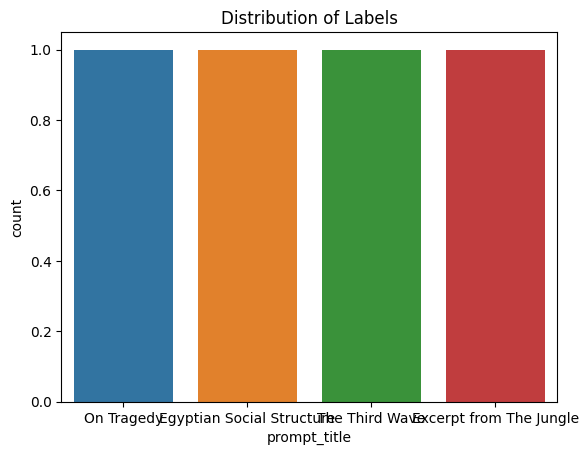

In [ ]:
# Create a countplot for 'prompt_title'
sns.countplot(x="prompt_title", data=data)
plt.title("Distribution of Labels")
plt.show()
plt.close()

### Display the length of the texts


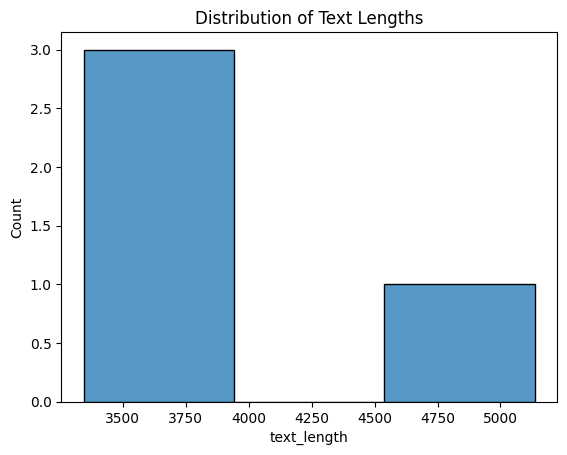

In [ ]:
# Create a histogram of text lengths
data["text_length"] = data["prompt_text"].apply(len)
sns.histplot(data["text_length"])
plt.title("Distribution of Text Lengths")
plt.show()

### Display the most common words in the text


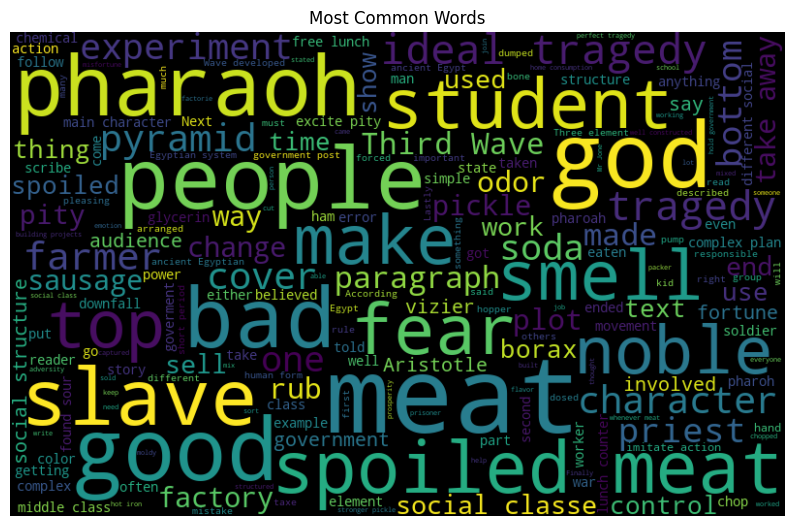

In [22]:
data = pd.read_csv("../data/eval_student_summaries/summaries_train.csv")

# Generate a wordcloud image from all the text
all_text = " ".join(data["text"])
wordcloud = WordCloud(
    width=800, height=500, random_state=21, max_font_size=110
).generate(all_text)

# Display the wordcloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words")
plt.show()
plt.close()

## Performance Metrics


Calculate and display more detailed performance metrics for a text classification model in a Jupyter notebook.

This assumes that you've already trained your model and made predictions on your validation data.

In this section:

- We first calculate the classification report, which includes precision, recall, and F1-score for each class, as well as overall accuracy.
- We then calculate and display the confusion matrix, which shows the number of true positives, true negatives, false positives, and false negatives for each class.
- If your problem is binary classification, we also calculate and display the ROC curve, which shows the trade-off between the true positive rate and false positive rate for different threshold values.
  - The area under the ROC curve (AUC) is also calculated as a single-number summary of model performance.

The specific metrics that are most relevant will depend on your problem.

Example:
If you have imbalanced classes, you might want to focus more on precision, recall, or the F1-score rather than overall accuracy.


### Import necessary libraries


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Calculate the classification report


In [ ]:
report = classification_report(val_data["label"], val_predictions, output_dict=True)
print(pd.DataFrame(report).transpose())

NameError: name 'val_data' is not defined

### Calculate and display the confusion matrix


In [ ]:
cm = confusion_matrix(val_data["label"], val_predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

### If your problem is binary classification, you can also calculate and display the ROC curve


In [ ]:
if len(np.unique(val_data["label"])) == 2:
    fpr, tpr, _ = roc_curve(val_data["label"], val_predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(
        fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.show()

## Sentiment Analysis


Sentiment analysis is a common type of binary classification problem in NLP, where the goal is to determine whether a given text is positive or negative.

In this section:

- We calculate the classification report as before, but now we specify that the classes are 'Negative' and 'Positive'.
- We calculate and display the confusion matrix as before, but now we label the axes with 'Negative' and 'Positive'.
- We calculate and display the ROC curve as before. This is particularly useful for binary classification problems like sentiment analysis, as it shows how the model's performance changes as the threshold for deciding between 'Negative' and 'Positive' is varied.


In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Calculate the classification report


In [ ]:
report = classification_report(
    val_data["label"],
    val_predictions,
    target_names=["Negative", "Positive"],
    output_dict=True,
)
print(pd.DataFrame(report).transpose())

### Calculate and display the confusion matrix


In [ ]:
cm = confusion_matrix(val_data["label"], val_predictions)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"],
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Calculate and display the ROC curve


In [ ]:
fpr, tpr, _ = roc_curve(val_data["label"], val_predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning


Tune the hyperparameters of a model. This example uses `GridSearchCV` from `scikit-learn`, which performs an exhaustive search over a specified parameter grid.
This assumes that you're using a model that's compatible with `scikit-learn`.

In this section:

- We first define the model and the parameter grid. The parameter grid is a dictionary where the keys are the parameter names and the values are lists of values to try.
- We then create a GridSearchCV object, specifying the model, the parameter grid, the number of folds to use for cross-validation (cv), and the scoring metric.
- We fit the GridSearchCV object to the data. This will perform cross-validation for each combination of parameters in the parameter grid.
- We then print the best parameters and the best score found by the grid search.
- Finally, we retrieve the best model, which is an instance of the model with the best parameters. We can use this model to make predictions.

Remember, grid search can be computationally expensive, especially if the parameter grid is large and the model is complex.

You might want to start with a smaller grid or use a more efficient search method like `RandomizedSearchCV`.


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define your model
model = Model()

# Define the parameter grid
param_grid = {
    "param1": [value1, value2, value3],
    "param2": [value1, value2, value3],
    # Add more parameters here as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# Fit the GridSearchCV object to the data
grid_search.fit(train_data["text"], train_data["label"])

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Retrieve the best model
best_model = grid_search.best_estimator_

# You can now use best_model to make predictions, just like you would with your original model